In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd

wine = pd.read_csv("winequality-red.csv")
wine.head()

data = wine.values[:,:11]
data_columns = list(wine.columns.values[:11])
target=wine.values[:,11]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,random_state=109)


## Perceptron

Clasificar los datos correspondientes al dataset de vino tinto utilizando un perceptron


Cantidad de iteraciones: 10


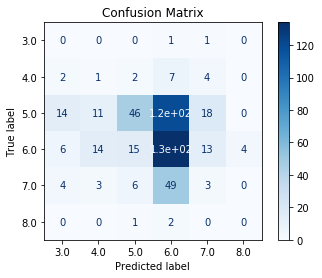

In [2]:
p = Perceptron(
             # random_state=42,
              max_iter=150,
              tol=0.001              
              )
p.fit(X_train, y_train)
print("Cantidad de iteraciones: " +str(p.n_iter_))
disp = metrics.plot_confusion_matrix(p, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

- ¿Es posible clasificar correctamente los casos utilizando un Perceptron?
- ¿Cuántas iteraciones son necesarias?

Si es posible, pero no es el metodo optimo, clasifica mal

## Perceptron multicapa

Clasificar los datos correspondientes al dataset de vino tinto utilizando un perceptron multicapa

In [3]:
activation = "identity"
#activation = "logistic"
#activation = "tanh"
#activation = "relu"
mlp = MLPClassifier(#random_state=42,
                    hidden_layer_sizes=(10,2),
                    max_iter = 1000,
                    activation = activation,
                    verbose = True
                    )
mlp.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = 30.23293310
Iteration 6, loss = 26.84551961
Iteration 7, loss = 24.08463904
Iteration 8, loss = 21.96290949
Iteration 9, loss = 20.57278650
Iteration 10, loss = 19.07790719
Iteration 11, loss = 17.58832605
Iteration 12, loss = 16.44705991
Iteration 13, loss = 15.30178997
Iteration 14, loss = 14.23534233
Iteration 15, loss = 13.19035435
Iteration 16, loss = 12.21374373
Iteration 17, loss = 11.35980588
Iteration 18, loss = 10.42431074
Iteration 19, loss = 9.55743835
Iteration 20, loss = 8.73701995
Iteration 21, loss = 7.87085452
Iteration 22, loss = 7.09884277
Iteration 23, loss = 6.32704736
Iteration 24, loss = 5.63100005
Iteration 25, loss = 5.06213807
Iteration 26, loss = 4.48508975
Iteration 27, loss = 3.91369303
Iteration 28, loss = 3.35131608
Iteration 29, loss = 2.83656884
Iteration 30, loss = 2.30546899
Iteration 31, loss = 1.79307868
Iteration 32, loss = 1.76270983

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

Cantidad de iteraciones: 192


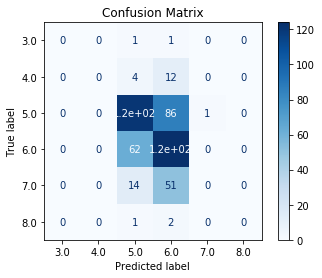

In [4]:
print("Cantidad de iteraciones: " +str(mlp.n_iter_))
disp = metrics.plot_confusion_matrix(mlp, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

- ¿Es posible clasificar correctamente los casos utilizando un Perceptron?
- ¿Cuántas iteraciones son necesarias?

Si es posible clasificar, es mas optimo que el metodo simple capa.
Cantidad de iteraciones: 192

Si es posible clasificar utilizando este metodo, no es optimo al 100% pero es mejor al anterior,
se utilizo un sistema de capas de 10,2 y con 188 iteraciones logro su mejor performance o version.